In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directories for the images

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'



# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  # Label 0 for benign
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images =load_images_from_folder(vata_dir, 2) # Label 1 for malignant


# Data Augmentation
import cv2
import random

import cv2
import random
import numpy as np

def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        # Get image dimensions
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))
         # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images



# Apply augmentation to both benign and malignant images
augmented_kapha_images = augment_images(kapha_images, 0)  # Label 0 for benign
augmented_pittha_images = augment_images(pittha_images, 1)  # Label 1 for malignant
augmented_vata_images = augment_images(vata_images, 2)  # Label 1 for malignant

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_pittha_images+augmented_kapha_images+augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)


# Normalize images for VGG-16
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 128x128x3 for VGG-16 input (duplicate channels if grayscale)
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [3]:
X_train.shape,X_test.shape,X.shape

((705, 128, 128, 3), (177, 128, 128, 3), (882, 128, 128, 3))

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.5236 - loss: 2.0623 - val_accuracy: 0.8305 - val_loss: 0.5557
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.8974 - loss: 0.3099 - val_accuracy: 0.9153 - val_loss: 0.2918
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.9896 - loss: 0.0280 - val_accuracy: 0.9492 - val_loss: 0.2016
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9209 - val_loss: 0.2496
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9548 - val_loss: 0.2080
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9605 - val_loss: 0.2052
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9605 - val_loss: 0.2028
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.

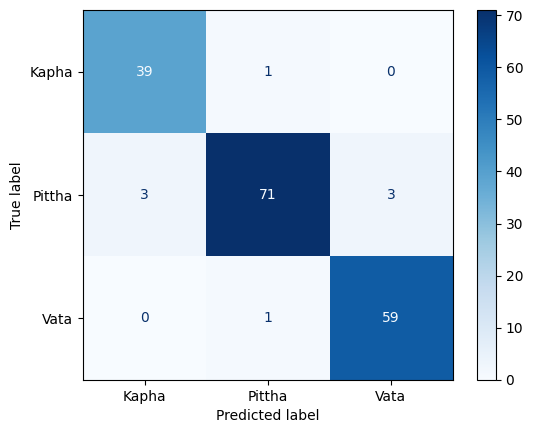

Accuracy: 95.48%


In [4]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# Build the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of MobileNet
model = Model(inputs=base_model.input, outputs=Dense(3, activation='softmax')(Flatten()(base_model.output)))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kapha', 'Pittha', 'Vata'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [5]:
from sklearn.metrics import classification_report

# After predicting with the trained model (using model.predict)
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.97      0.92      0.95        77
           2       0.95      0.98      0.97        60

    accuracy                           0.95       177
   macro avg       0.95      0.96      0.96       177
weighted avg       0.96      0.95      0.95       177



In [ ]:
# Function to preprocess and predict a single image
def predict_image(image_path, model, class_labels):
    """
    Predict the class of an image using the trained model.

    Parameters:
    - image_path: str, path to the input image.
    - model: trained TensorFlow/Keras model.
    - class_labels: list, names of the classes.

    Returns:
    - Predicted class and the corresponding probabilities.
    """
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    # Resize the image to match the model's input shape
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_normalized = img_resized / 255.0
    
    # Expand dimensions to match model input shape (1, 128, 128, 3)
    img_input = np.expand_dims(img_normalized, axis=0)
    
    # Predict the class probabilities
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Return the predicted class and probabilities
    return class_labels[predicted_class], predictions[0]

# Example usage
class_labels = ['Kapha', 'Pittha', 'Vata']  # Replace with your class labels
image_path = 'path_to_your_image.jpg'       # Replace with the actual path to your image

predicted_class, probabilities = predict_image(image_path, model, class_labels)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted Class: Vata
Class Probabilities: [0.00184403 0.00708302 0.99107295]
